In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from utils import abs_listdir

In [2]:
csv_results = abs_listdir('csv/kernels_parsed')

In [3]:
df = pd.read_csv(csv_results[1])
df

,node type,start,first,avg_ms,%,cdf%,mem KB,times called,name
0,CONV_2D,0.0000,24.450,24.25850,39.9122%,39.9122%,0,1,[sequential_15/conv2d_60/Conv2D]:0
1,PAD,24.2603,0.267,0.27122,0.446235%,40.3585%,0,1,[sequential_15/zero_padding2d_60/Pad]:1
2,MAX_POOL_2D,24.5322,1.926,1.87394,3.08317%,43.4417%,0,1,[sequential_15/max_pooling2d_60/MaxPool]:2
3,CONV_2D,26.4070,17.629,17.15400,28.2233%,71.665%,0,1,[sequential_15/conv2d_61/Conv2D]:3
4,PAD,43.5624,0.133,0.13484,0.221851%,71.8868%,0,1,[sequential_15/zero_padding2d_61/Pad]:4
5,MAX_POOL_2D,43.6979,0.535,0.53950,0.887633%,72.7745%,0,1,[sequential_15/max_pooling2d_61/MaxPool]:5
6,CONV_2D,44.2379,11.084,10.55180,17.3608%,90.1352%,0,1,[sequential_15/conv2d_62/Conv2D]:6
7,PAD,54.7912,0.065,0.06516,0.107207%,90.2424%,0,1,[sequential_15/zero_padding2d_62/Pad]:7
8,MAX_POOL_2D,54.8570,0.281,0.20138,0.331328%,90.5738%,0,1,[sequential_15/max_pooling2d_62/MaxPool]:8
9,CONV_2D,55.0590,5.218,5.55966,9.14725%,99.721%,0,1,[sequential_15/conv2d_63/Conv2D]:9


In [4]:
dfs = {os.path.split(r)[1] : pd.read_csv(r) for r in csv_results}
conv_time_total = {}
padding_time_total = {}
kernel_size = {}

for filename, df in dfs.items():
    # convolution statistics
    df_convs = df[df['node type'].apply(lambda s: 'CONV' in s)]
    conv_time_total[filename] = df_convs[' avg_ms'].sum()

    # kernel size
    # exclude extension from filename
    fname = filename[:filename.index('.')]
    ks = fname.split('_')[2:4]
    ks = (int(ks[0]), int(ks[1]))
    kernel_size[filename] = ks

result = pd.DataFrame({'kernel_size': kernel_size,
                       'conv_time_total': conv_time_total})
result.sort_index(inplace=True)
result

,kernel_size,conv_time_total
kernel_size_1_1.csv,"(1, 1)",0.849507
kernel_size_2_2.csv,"(2, 2)",5.270264
kernel_size_3_3.csv,"(3, 3)",9.243840
kernel_size_4_4.csv,"(4, 4)",14.545840
kernel_size_5_5.csv,"(5, 5)",22.088280
kernel_size_6_6.csv,"(6, 6)",32.512420
kernel_size_7_7.csv,"(7, 7)",45.091920
kernel_size_8_8.csv,"(8, 8)",57.523960
kernel_size_9_9.csv,"(9, 9)",71.491860


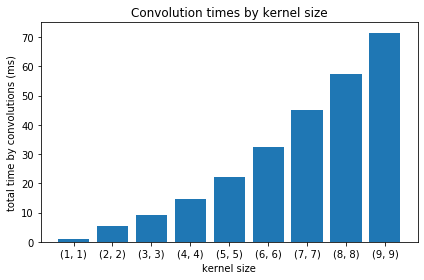

In [5]:
fig, ax = plt.subplots()

ax.set_ylabel('total time by convolutions (ms)')
ax.set_title('Convolution times by kernel size')
ax.set_xlabel('kernel size')


x = np.arange(len(result))
ax.bar(x, result['conv_time_total'])
xlabels = [str(s) for s in result['kernel_size']]
ax.set_xticks(x)
ax.set_xticklabels(xlabels)


fig.tight_layout()
plt.show()